# Data Bootcamp:  Demography

We love demography, specifically the dynamics of the population.  

We take a look at the UN's [demography data](http://esa.un.org/unpd/wpp/Download/Standard/Population/):  the age distribution of the population, life expectancy, fertility, and mortality.  We urge you to explore their website, it's filled with interesting data.  There are other sources that cover longer time periods, and for some countries you can get detailed data on specific things (causes of death, for example).  

We use a number of countries as examples, but Japan and China are the most striking.  The code is written so that the country is easily changed.  

This IPython notebook was created by Dave Backus, Chase Coleman, and Spencer Lyon for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  

## Preliminaries

Import statements and a date check for future reference.   

In [26]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import matplotlib as mpl              # graphics parameters
import numpy as np                    # numerical calculations 

# IPython command, puts plots in notebook 
%matplotlib inline

# check Python version 
import datetime as dt 
import sys
print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='') 

Today is 2016-03-22
What version of Python are we running? 
3.5.1 |Anaconda 2.5.0 (64-bit)| (default, Jan 29 2016, 15:01:46) [MSC v.1900 64 bit (AMD64)]


## Population by age 

We have both "estimates" of the past (1950-2015) and "projections" of the future (out to 2100).  Here we focus on the latter, specifically what the UN refers to as the medium variant:  their middle of the road projection.  It gives us a sense of how Japan's population might change over the next century. 

It takes a few seconds to read the data.  

In [27]:
url1 = 'http://esa.un.org/unpd/wpp/DVD/Files/'
url2 = '1_Indicators%20(Standard)/EXCEL_FILES/1_Population/'
url3 = 'WPP2015_POP_F07_1_POPULATION_BY_AGE_BOTH_SEXES.XLS'
url = url1 + url2 + url3 

cols = [2, 4, 5] + list(range(6,28))
#est = pd.read_excel(url, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])
prj = pd.read_excel(url, sheetname=1, skiprows=16, parse_cols=cols, na_values=['…'])

"""
for later:  change cols for the two sources, rename 80+ to 80-84, then concat 
#pop = pd.concat([est, prj], axis=0, join='outer')      
"""
pop = prj 
pop.head()

,"Major area, region, country or area *",Country code,Reference date (as of 1 July),0-4,5-9,10-14,15-19,20-24,25-29,30-34,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,WORLD,900,2015,670928.185,637448.895,607431.299,590069.337,603508.555,609793.207,551085.426,...,339691.467,292726.792,215047.151,153207.026,114652.312,71449.698,37062.196,13388.529,2921.852,450.895
1,WORLD,900,2020,677599.590,664282.610,634568.409,604322.921,585831.926,599278.263,604808.769,...,387339.470,320927.366,267874.842,187441.892,123355.620,81851.457,42700.991,16937.683,4242.605,605.465
2,WORLD,900,2025,673174.914,671929.973,661684.410,631509.113,600050.925,581681.875,594598.480,...,428166.199,367325.750,295011.725,234797.844,152989.596,89822.147,49847.989,20116.420,5538.923,905.182
3,WORLD,900,2030,672121.017,667926.121,669744.224,658942.513,627343.133,595871.013,577192.328,...,450091.908,407564.034,339528.512,260426.171,193066.277,113475.561,56221.915,24041.609,6836.461,1244.851
4,WORLD,900,2035,678271.589,667353.285,665875.094,667248.100,655034.545,623315.619,591598.185,...,456022.842,429343.580,378601.876,301893.804,216249.259,144393.943,72643.007,28074.222,8397.572,1617.797


In [28]:
# rename some variables 
pop = pop.rename(columns={'Reference date (as of 1 July)': 'Year', 
                          'Major area, region, country or area *': 'Country', 
                          'Country code': 'Code'})
# select Japan and years 
countries = ['Japan']
years     = [2015, 2055, 2095]
pop = pop[pop['Country'].isin(countries) & pop['Year'].isin(years)]
pop = pop.drop(['Country', 'Code'], axis=1)
pop.head()

,Year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
1458,2015,5269.038,5398.973,5603.638,5960.784,6111.768,6843.421,7455.687,8345.753,9689.865,...,7535.334,8530.749,9452.518,7770.410,6297.532,4940.325,3115.732,1338.774,366.082,60.630
1466,2055,4271.907,4371.016,4458.145,4557.117,4685.414,4829.637,5013.420,5236.482,5422.259,...,5971.177,5985.655,6493.459,6798.299,7167.066,7456.047,5368.363,3233.182,1437.057,462.541
1474,2095,3720.541,3789.596,3860.493,3938.189,4025.477,4106.967,4194.272,4290.983,4396.048,...,4640.419,4698.495,4750.410,4819.804,4876.471,4761.542,4300.830,3407.697,2082.468,844.420


In [29]:
pop = pop.set_index('Year').T/1000
pop.head()

Year,2015,2055,2095
0-4,5.269038,4.271907,3.720541
5-9,5.398973,4.371016,3.789596
10-14,5.603638,4.458145,3.860493
15-19,5.960784,4.557117,3.938189
20-24,6.111768,4.685414,4.025477


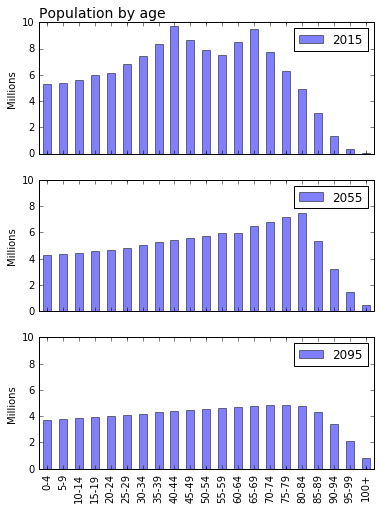

In [30]:
ax = pop.plot(kind='bar',  
              color='blue', 
              alpha=0.5, subplots=True, sharey=True, figsize=(6, 8))

for axnum in range(len(ax)):  
    ax[axnum].set_title('')
    ax[axnum].set_ylabel('Millions')
        
ax[0].set_title('Population by age', fontsize=14, loc='left')   

## Fertility:  aka birth rates

We might wonder, why is the population falling in Japan?  Other countries?  Well, one reason is that birth rates are falling.  Demographers call this fertility.  Here we look at the fertility using the same [UN source](http://esa.un.org/unpd/wpp/Download/Standard/Fertility/) as the previous example.  We look at two variables:  total fertility and fertility by age of mother.  In both cases we explore the numbers to date, but the same files contain projections of future fertility.  

In [31]:
# fertility overall 
uft  = 'http://esa.un.org/unpd/wpp/DVD/Files/'
uft += '1_Indicators%20(Standard)/EXCEL_FILES/'
uft += '2_Fertility/WPP2015_FERT_F04_TOTAL_FERTILITY.XLS'

cols = [2] + list(range(5,18))
ftot = pd.read_excel(uft, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])

In [32]:
ftot[list(range(8))].head(3)

,"Major area, region, country or area *",1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985
0,WORLD,4.961571,4.898665,5.024379,4.922202,4.475478,3.865195,3.591816
1,More developed regions,2.823786,2.807368,2.685900,2.387534,2.150816,1.917349,1.843806
2,Less developed regions,6.075417,5.941033,6.129418,6.034843,5.416602,4.585636,4.167889


In [33]:
# rename some variables 
f = ftot.rename(columns={'Major area, region, country or area *': 'Country'}) 

# select countries 
countries = ['China', 'Japan', 'Germany', 'United States of America']
f = f[f['Country'].isin(countries)]

# shape
f = f.set_index('Country').T 
f = f.rename(columns={'United States of America': 'United States'})
f.tail()

Country,China,Japan,Germany,United States
1990-1995,2.00,1.4760,1.3007,2.0297
1995-2000,1.48,1.3690,1.3456,1.9965
2000-2005,1.50,1.2980,1.3513,2.0420
2005-2010,1.53,1.3388,1.3623,2.0590
2010-2015,1.55,1.3960,1.3909,1.8902


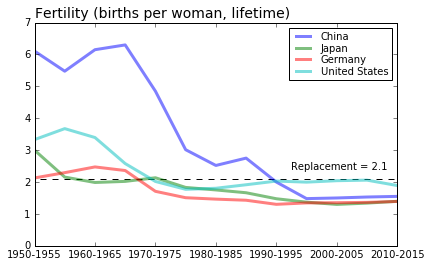

In [34]:
fig, ax = plt.subplots()
f.plot(ax=ax, kind='line', alpha=0.5, lw=3, figsize=(6.5, 4))
ax.set_title('Fertility (births per woman, lifetime)', fontsize=14, loc='left')
ax.legend(loc='best', fontsize=10, handlelength=2, labelspacing=0.15)
ax.set_ylim(ymin=0)
ax.hlines(2.1, -1, 13, linestyles='dashed')
ax.text(8.5, 2.4, 'Replacement = 2.1')

**Fertility by age.** Here we look at how fertility varies by the age of the mother.  The US is different from many other countries in having younger mothers, and specifically teen mothers.  



In [36]:
# fertility by age 
ufa  = 'http://esa.un.org/unpd/wpp/DVD/Files/'
ufa += '1_Indicators%20(Standard)/EXCEL_FILES/'
ufa += '2_Fertility/WPP2015_FERT_F07_AGE_SPECIFIC_FERTILITY.XLS'

cols = [2, 5] + list(range(6,13))
fage = pd.read_excel(ufa, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])
fage.head()

,"Major area, region, country or area *",Period,15-19,20-24,25-29,30-34,35-39,40-44,45-49
0,WORLD,1950-1955,86.880733,235.665285,250.424301,200.005251,138.588139,65.064292,15.686229
1,WORLD,1955-1960,85.445941,236.617613,249.435312,195.789574,134.457236,63.276305,14.711074
2,WORLD,1960-1965,85.308984,246.270684,257.409085,202.731168,136.168132,62.621840,14.365994
3,WORLD,1965-1970,80.548267,243.820849,257.697356,199.095776,130.289692,59.171188,13.817271
4,WORLD,1970-1975,74.561984,227.455682,241.455000,176.637948,112.222639,50.513435,12.249008


In [ ]:
# pivots

## Life expectancy 

One of the bottom line summary numbers for mortality is life expectancy:  if mortaility rates fall, people live longer, on average.  Here we look at life expectancy at birth.  There are also numbers for life expectancy given than you live to some specific age; for example, life expectancy given that you survive to age 60. 

In [17]:
# life expectancy at birth, both sexes  
ule  = 'http://esa.un.org/unpd/wpp/DVD/Files/1_Indicators%20(Standard)/EXCEL_FILES/3_Mortality/'
ule += 'WPP2015_MORT_F07_1_LIFE_EXPECTANCY_0_BOTH_SEXES.XLS'

cols = [2] + list(range(5,34))
le  = pd.read_excel(ule, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])

le.head(3)[list(range(10))]

,"Major area, region, country or area *",1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995
0,WORLD,46.807955,49.211594,51.069722,55.378481,58.049389,60.212254,61.989053,63.610776,64.536781
1,More developed regions,64.669835,67.679537,69.440381,70.281907,71.063794,71.960446,72.806852,73.901457,74.107521
2,Less developed regions,41.508118,43.882493,46.017378,51.441078,54.770858,57.342650,59.418113,61.229860,62.453399


In [18]:
# rename some variables 
oldname = list(le)[0]
l = le.rename(columns={oldname: 'Country'}) 
l.head(3)

,Country,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
0,WORLD,46.807955,49.211594,51.069722,55.378481,58.049389,60.212254,61.989053,63.610776,64.536781,65.583898,67.051324,68.841280,70.477153
1,More developed regions,64.669835,67.679537,69.440381,70.281907,71.063794,71.960446,72.806852,73.901457,74.107521,74.732605,75.552097,76.884941,78.300841
2,Less developed regions,41.508118,43.882493,46.017378,51.441078,54.770858,57.342650,59.418113,61.229860,62.453399,63.675917,65.289252,67.098831,68.752576


In [19]:
# select countries 
countries = ['China', 'Japan', 'Germany', 'United States of America']
l = l[l['Country'].isin(countries)]

# shape
l = l.set_index('Country').T 
l = l.rename(columns={'United States of America': 'United States'})
l.tail()

Country,China,Japan,Germany,United States
1990-1995,69.386,79.447,75.878,75.617
1995-2000,70.587,80.475,77.212,76.404
2000-2005,72.852,81.829,78.573,77.133
2005-2010,74.438,82.621,79.757,78.113
2010-2015,75.432,83.298,80.647,78.873


(0, 85.0)

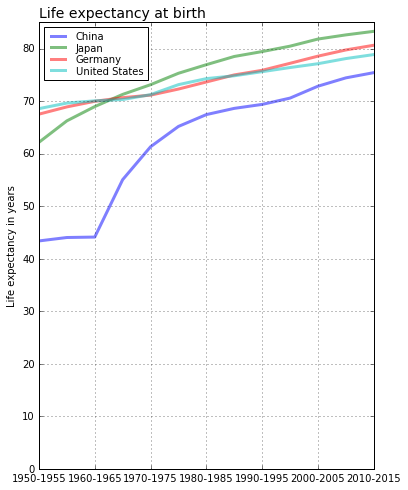

In [20]:
fig, ax = plt.subplots()
l.plot(ax=ax, kind='line', alpha=0.5, lw=3, figsize=(6, 8), grid=True)
ax.set_title('Life expectancy at birth', fontsize=14, loc='left')
ax.set_ylabel('Life expectancy in years')
ax.legend(loc='best', fontsize=10, handlelength=2, labelspacing=0.15)
ax.set_ylim(ymin=0)

**Comments and questions.**

* Can we use a dashed line for the projections?  
* Would it look better without the zero lower limit on the y axis. 
* Why is the US falling behind?  Mortality of the young?  

## Mortality:  aka death rates 

Another thing that affects the age distribution of the population is the mortality rate:  if mortality rates fall people live longer, on average.  Here we look at how mortality rates have changed over the past 60+ years.  Roughly speaking, people live an extra decade every generation.  Which is a lot.  Many of you will live to be a hundred.  (Look at the 100+ agen category over time for Japan.)  

The UN has a [whole page](http://esa.un.org/unpd/wpp/Download/Standard/Mortality/) devoted to mortality numbers.  We take 5-year mortality rates from the Abridged Life Table.  

It takes a few seconds to read the spreadsheet.  

In [11]:
# mortality overall 
url  = 'http://esa.un.org/unpd/wpp/DVD/Files/'
url += '1_Indicators%20(Standard)/EXCEL_FILES/3_Mortality/'
url += 'WPP2015_MORT_F17_1_ABRIDGED_LIFE_TABLE_BOTH_SEXES.XLS'

cols = [2, 5, 6, 7, 9]
mort = pd.read_excel(url, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])
mort.tail(3)

,"Major area, region, country or area *",Period,Age (x),Age interval (n),"Probability of dying q(x,n)"
59524,Tonga,2010-2015,75,5,0.279867
59525,Tonga,2010-2015,80,5,0.397735
59526,Tonga,2010-2015,85,15,NaN


In [12]:
# change names 
names = list(mort)
m = mort.rename(columns={names[0]: 'Country', names[2]: 'Age', names[3]: 'Interval', names[4]: 'Mortality'})
m.head(3)

,Country,Period,Age,Interval,Mortality
0,WORLD,1950-1955,0,1,0.141804
1,WORLD,1950-1955,1,4,0.085487
2,WORLD,1950-1955,5,5,0.031513


**Comment.** At this point, we need to pivot the data.  That's not something we've done before, so take it as simply something we can do easily if we have to.  We're going to do this twice to produce different graphs.  

* Compare countries for the same period.  
* Compare different periods for the same country.  

In [21]:
# compare countries for most recent period
countries = ['China', 'Japan', 'Germany', 'United States of America']
mt = m[m['Country'].isin(countries) & m['Interval'].isin([5]) & m['Period'].isin(['2010-2015'])] 
print('Dimensions:', mt.shape) 

mp = mt.pivot('Age', 'Country', 'Mortality')  # inputs are index, columns, and values (data)
mp.head(3)

Dimensions: (64, 5)


Country,China,Germany,Japan,United States of America
Age,,,,
5,0.001756,0.000397,0.000462,0.000597
10,0.001286,0.000456,0.000437,0.000714
15,0.001844,0.001300,0.001141,0.002264


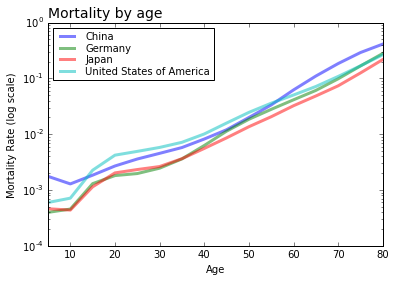

In [24]:
fig, ax = plt.subplots()
mp.plot(ax=ax, kind='line', alpha=0.5, linewidth=3, 
        logy=True, 
        figsize=(6, 4))
ax.set_title('Mortality by age', fontsize=14, loc='left')
ax.set_ylabel('Mortality Rate (log scale)')
ax.legend(loc='best', fontsize=10, handlelength=2, labelspacing=0.15)

**Questions.**

* What country's old people have the lowest mortality?
* What do you see here for the US?  Why is our life expectancy shorter?
* Anything else cross your mind?  

In [15]:
# compare periods for the same country
mt = m[m['Country'].isin(countries[0]) & m['Interval'].isin([5])] 
print('Dimensions:', mt.shape) 

mp = mt.pivot('Age', 'Period', 'Mortality')  # inputs are index, columns, and values (data)
mp = mp[[0, 6, 12]]
mp.head(3)

Dimensions: (208, 5)


Period,1950-1955,1980-1985,2010-2015
Age,,,
5,0.043088,0.006487,0.001756
10,0.025641,0.003300,0.001286
15,0.026845,0.004172,0.001844


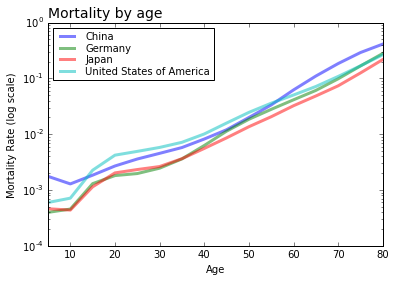

In [25]:
fig, ax = plt.subplots()
mp.plot(ax=ax, kind='line', alpha=0.5, linewidth=3, 
        logy=True, 
        figsize=(6, 4))
ax.set_title('Mortality by age', fontsize=14, loc='left')
ax.set_ylabel('Mortality Rate (log scale)')
ax.legend(loc='best', fontsize=10, handlelength=2, labelspacing=0.15)